Name: Jeffrey Jose, ID: 1313512 <br/>
Name: Christian Richardson, ID: 1312908

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import statements I think may be neccessary for this assignment
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")
# Any results you write to the current directory are saved as output.

['mnist_train.csv', 'mnist_test.csv']


In [2]:
from sklearn.ensemble import ExtraTreesClassifier

train = pd.read_csv('../input/mnist_train.csv', dtype = int)
x_train = train.drop(['label'], axis = 1)
y_train = train['label']

test = pd.read_csv('../input/mnist_test.csv', dtype = int)
x_test = test.drop(['label'], axis = 1)
y_test = test['label']

x_train = np.array(x_train)
x_test = np.array(x_test)
#Assume max_features is set to auto by default
#Method to initialise the classifier to
def direct_init_clf(clf, n_estimator, max_depth):
    return clf(n_estimators = n_estimator, random_state = 1312908, bootstrap = True, oob_score = True, n_jobs = -1, max_depth = max_depth)

### ExtraTreesClassifier Ensemble

In [3]:
max_depth_range = range(10, 61, 10)
#param_grid = dict(max_depth = max_depth)
highIndexPositon = 0 #This variable holds the index position of the best max_depth
#Optional
oobArray = [] #Holds all the oob scores generated
bestDepth = [] #Holds all the max_depths used
#Finding the best depth
for i in range(len(max_depth_range)):
    clf_extraTrees = ""
    clf_extraTrees = direct_init_clf(ExtraTreesClassifier, 300, max_depth_range[i])
    clf_extraTrees.fit(x_train, y_train)
    oobArray.append(clf_extraTrees.oob_score_)
    bestDepth.append(max_depth_range[i])
    
    #print("Test Function")

currentHighScore = 0
currentHighIndexPosition = 0
highScore = 0
for k in range(len(oobArray)):
    if(k == 0):
        currentHighScore = oobArray[k]
        currentHighIndexPosition = 0
    else:
        if(oobArray[k] > currentHighScore):
            currentHighScore = oobArray[k]
            currentHighIndexPosition = k
    
highScore = currentHighScore
highIndexPosition = currentHighIndexPosition

print("The highest OOB Score is " + str(highScore) + " where the max depth is " + str(bestDepth[highIndexPosition]))

The highest OOB Score is 0.96915 where the max depth is 40


In [4]:
from sklearn.metrics import accuracy_score

best_clf = direct_init_clf(ExtraTreesClassifier, 300, max_depth_range[highIndexPosition])

best_clf.fit(x_train, y_train)

pred = best_clf.predict(x_test)
accuracyScore = best_clf.score(x_test, y_test)
print("The prediction accuracy (tested with the best max_depth) is: {:0.2f}%".format(accuracyScore * 100))

The prediction accuracy (tested with the best max_depth) is: 96.99%


In [5]:
#decisionStorage = []
decisionStorage = best_clf.oob_decision_function_
print(decisionStorage)

[[0.00763359 0.00763359 0.01526718 ... 0.03053435 0.04580153 0.02290076]
 [0.98319328 0.         0.         ... 0.         0.00840336 0.        ]
 [0.00961538 0.00961538 0.01923077 ... 0.01923077 0.01923077 0.10576923]
 ...
 [0.         0.         0.         ... 0.00934579 0.01869159 0.03738318]
 [0.04424779 0.         0.04424779 ... 0.00884956 0.00884956 0.        ]
 [0.01923077 0.00961538 0.05769231 ... 0.03846154 0.63461538 0.08653846]]


In [6]:
#predict will give either 0 or 1 as output
#predict_proba will give the only probability of 1
probability = best_clf.predict_proba(x_test)
print(probability)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 1.00000000e-02 7.33333333e-01 ... 0.00000000e+00
  3.00000000e-02 0.00000000e+00]
 [0.00000000e+00 9.99955248e-01 3.97772474e-06 ... 7.02787813e-06
  1.45957259e-05 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 3.33333333e-03 ... 1.66666667e-02
  4.33333333e-02 8.66666667e-02]
 [2.66666667e-02 1.00000000e-02 2.66666667e-02 ... 6.66666667e-03
  1.03333333e-01 2.00000000e-02]
 [6.66666667e-03 0.00000000e+00 3.33333333e-03 ... 0.00000000e+00
  3.33333333e-03 3.33333333e-03]]


### Bagged And Boosted Single Extra Trees

In [7]:
import operator
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

def single_extra_tree(depth = None, seed = 1312908):
    return ExtraTreesClassifier(max_depth = depth, n_estimators = 1, bootstrap = False, random_state = seed)

boost = AdaBoostClassifier(base_estimator = single_extra_tree(), n_estimators = 10, random_state = 1312908)
bag = BaggingClassifier(base_estimator = boost, n_estimators = 30, bootstrap = True, oob_score = True, n_jobs = -1, random_state = 1312908)

rangeList = range(10, 61, 10)
oobArraySecond = []
bestDepthSecond = []
for i in range(len(rangeList)):
    bag_clf = ""
    boost = ""
    bag = ""
    boost = AdaBoostClassifier(base_estimator = single_extra_tree(rangeList[i], 1312908), n_estimators = 10, random_state = 1312908)
    bag = BaggingClassifier(base_estimator = boost, n_estimators = 30, bootstrap = True, oob_score = True, n_jobs = -1, random_state = 1312908)
    bag_clf = bag
    bag_clf.fit(x_train, y_train)
    oobArraySecond.append(bag_clf.oob_score_)
    bestDepthSecond.append(rangeList[i])
    
index, value = max(enumerate(oobArraySecond), key = operator.itemgetter(1))
print("The highest OOB score is " + str(value) + " where the max depth is " + str(bestDepthSecond[index]))

The highest OOB score is 0.9648666666666667 where the max depth is 30


In [8]:
boost1 = AdaBoostClassifier(base_estimator = single_extra_tree(bestDepthSecond[index], 1312908), n_estimators = 10)
bestSecond_clf = BaggingClassifier(base_estimator = boost1, n_estimators = 30, bootstrap = True, oob_score = True, n_jobs = -1, random_state = 1312908)
bestSecond_clf.fit(x_train, y_train)
pred_second = best_clf.predict(x_test)
print("The prediction accuracy: " + str(accuracy_score(y_test, pred_second)))
#accuracyScoreSecond = bestSecond_clf.score(x_test, y_test)
#print("The prediction accuracy (tested with the best max_depth) is: {:0.2f}%".format(accuracyScoreSecond * 100))

The prediction accuracy: 0.9699


In [9]:
#decisionStorageSecond = []
decisionStorageSecond = bestSecond_clf.oob_decision_function_
print(decisionStorageSecond)

[[1.85530436e-06 2.74947332e-07 1.71253020e-06 ... 1.20481903e-06
  2.19328010e-05 5.09429470e-07]
 [1.00000000e+00 1.86397284e-15 2.28467585e-15 ... 2.13688150e-15
  2.14731970e-15 2.02697381e-15]
 [4.01083054e-05 3.00067942e-08 1.10952217e-06 ... 1.24368620e-06
  3.40561294e-08 4.02420006e-05]
 ...
 [1.18649576e-13 5.27734920e-13 9.16527241e-14 ... 7.99380192e-14
  3.42670054e-11 2.97218582e-12]
 [1.50311328e-03 2.44299338e-09 3.11130524e-07 ... 2.93206214e-08
  1.10403616e-08 4.72491415e-08]
 [7.21337449e-03 3.52253607e-05 3.70442445e-03 ... 9.17436850e-04
  8.77600930e-01 4.26379897e-03]]


In [10]:
#predict will give either 0 or 1 as output
#predict_proba will give the only probability of 1
probabilityBag = bestSecond_clf.predict_proba(x_test)
print(probabilityBag)

[[1.22402240e-13 1.59162342e-13 1.76185798e-12 ... 1.00000000e+00
  8.81240141e-13 5.48867202e-11]
 [9.81310043e-07 1.17900961e-05 9.40279689e-01 ... 2.83092174e-07
  1.24586499e-06 3.79004734e-07]
 [1.00335640e-14 1.00000000e+00 1.13882754e-12 ... 1.31466954e-12
  1.99839138e-12 7.01214304e-13]
 ...
 [1.58683666e-10 2.59298011e-10 4.09211270e-09 ... 2.04770766e-08
  3.06670469e-09 4.62816621e-05]
 [1.19149573e-05 2.73651514e-05 2.03584353e-05 ... 3.14846364e-05
  4.12208390e-02 3.08039163e-06]
 [3.72959817e-11 1.01002111e-11 7.03067787e-09 ... 7.88494251e-12
  3.60000249e-09 8.98362326e-12]]


### Bagged And Boosted Single Extra Trees On PCA

In [11]:
from sklearn.pipeline import Pipeline
#Bag a pipeline of PCA + AdaBoost (single_extra_tree())
num_components = [20, 40, 60]

pipeLineOOBArray = []
for i in range(len(num_components)):
    pca = ""
    pip = ""
    bagPipe = ""
    pca = PCA(n_components = num_components[i], svd_solver = 'randomized', random_state = 1312908)
    pip = Pipeline([('pca', pca), ('ada_xt', AdaBoostClassifier(base_estimator = single_extra_tree(depth = bestDepthSecond[index]), n_estimators = 10, random_state = 1312908))])
    bagPipe = BaggingClassifier(base_estimator = pip, n_estimators = 30, bootstrap = True, oob_score = True, n_jobs = -1, random_state = 1312908)
    bagPipe.fit(x_train, y_train)
    pipeLineOOBArray.append(bagPipe.oob_score_)

currHigh = 0
highOOB = 0
indexer = 0
rIndexer = 0
for k in range(len(pipeLineOOBArray)):
    if(k == 0):
        currHigh = pipeLineOOBArray[k]
        indexer = 0
    else:
        if(pipeLineOOBArray[k] > currHigh):
            currHigh = pipeLineOOBArray[k]
            indexer = k

highOOB = currHigh
rIndexer = indexer

print("The best number of component: " + str(num_components[rIndexer]) + " and the OOB Score is " + str(highOOB))

The best number of component: 40 and the OOB Score is 0.9536666666666667


In [12]:
pca = ""
pip = ""
bagPipe = ""
pca = PCA(n_components = num_components[rIndexer], svd_solver = 'randomized', random_state = 1312908)
pip = Pipeline([('pca', pca), ('ada_xt', AdaBoostClassifier(base_estimator = single_extra_tree(depth = bestDepthSecond[index]), n_estimators = 10, random_state = 1312908))])
bagPipe = BaggingClassifier(base_estimator = pip, n_estimators = 30, bootstrap = True, oob_score = True, n_jobs = -1, random_state = 1312908)

bagPipe.fit(x_train, y_train)
bagPipePred = bagPipe.predict(x_test)
print("Accuracy Score With PipeLine: " + str(accuracy_score(y_test, bagPipePred)))

Accuracy Score With PipeLine: 0.9604


In [13]:
#pipeDecisionStorage = []
pipeDecisionStorage = bagPipe.oob_decision_function_
print(pipeDecisionStorage)

[[1.58908425e-04 6.86158177e-05 9.49037054e-02 ... 2.70619772e-04
  3.93920513e-04 1.31732622e-04]
 [9.99999998e-01 5.17532300e-11 2.04486011e-10 ... 2.73288663e-10
  2.46444081e-12 4.62831220e-11]
 [5.18396567e-05 5.38752219e-05 5.25469903e-05 ... 7.43561281e-03
  6.32535126e-05 1.10548170e-01]
 ...
 [1.19839514e-06 2.14098150e-06 6.24277355e-08 ... 3.36784960e-06
  4.10706427e-06 1.31314388e-07]
 [7.57038641e-05 5.92433351e-05 5.87010676e-02 ... 2.10518650e-03
  4.85670910e-06 8.03838434e-06]
 [7.93160947e-05 2.09432412e-06 1.45821776e-04 ... 2.35789709e-03
  9.94437965e-01 1.78018603e-04]]


In [14]:
pipeProbability = bagPipe.predict_proba(x_test)
print(pipeProbability)

[[1.80138518e-10 2.29654361e-11 8.10029697e-09 ... 9.99999984e-01
  1.17210653e-11 7.21375171e-09]
 [1.10699773e-04 8.35257827e-07 9.54550558e-01 ... 3.24013578e-05
  9.18929681e-05 3.33772504e-05]
 [1.88819926e-14 1.00000000e+00 4.37295857e-13 ... 3.01800822e-14
  3.67457555e-13 3.65379198e-13]
 ...
 [2.37355878e-07 9.66876792e-07 6.72653679e-08 ... 3.28183800e-06
  1.44809535e-06 5.18731923e-02]
 [1.45079794e-04 1.57608964e-06 1.15008958e-04 ... 2.05291337e-03
  7.78171933e-02 5.15063202e-02]
 [2.50013542e-05 8.00255890e-10 8.75399897e-07 ... 1.85809605e-08
  1.18533013e-08 9.19226406e-10]]


## Voting

### Between All Classifiers

In [15]:
#decisionStorage, decisionStorageSecond, pipeDecisionStorage
#Estimating how good voting all three classifier might be

#Between all the classifiers
votingArray = np.sum([decisionStorage, decisionStorageSecond, pipeDecisionStorage], axis = 0)
votingArray

array([[7.79435152e-03, 7.70247855e-03, 1.10172594e-01, ...,
        3.08061757e-02, 4.62173800e-02, 2.30330054e-02],
       [2.98319328e+00, 5.17550939e-11, 2.04488296e-10, ...,
        2.73290800e-10, 8.40336135e-03, 4.62851489e-11],
       [9.70733258e-03, 9.66928984e-03, 1.92844257e-02, ...,
        2.66676257e-02, 1.92940568e-02, 2.16357642e-01],
       ...,
       [1.19839526e-06, 2.14098202e-06, 6.24278272e-08, ...,
        9.34916224e-03, 1.86956959e-02, 3.73833089e-02],
       [4.58266048e-02, 5.92457781e-05, 1.02949166e-01, ...,
        1.09547733e-02, 8.85442527e-03, 8.08563348e-06],
       [2.65234598e-02, 9.65270430e-03, 6.15425539e-02, ...,
        4.17368724e-02, 2.50665428e+00, 9.09802791e-02]])

In [16]:
#Accuracy for the train-set prediction
accuracy_score(y_train, np.argmax(votingArray, axis = 1))

0.9671666666666666

### Voting For Decision Storage

In [17]:
decisionVotingArray = np.sum([decisionStorage], axis = 0)
decisionVotingArray

array([[0.00763359, 0.00763359, 0.01526718, ..., 0.03053435, 0.04580153,
        0.02290076],
       [0.98319328, 0.        , 0.        , ..., 0.        , 0.00840336,
        0.        ],
       [0.00961538, 0.00961538, 0.01923077, ..., 0.01923077, 0.01923077,
        0.10576923],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00934579, 0.01869159,
        0.03738318],
       [0.04424779, 0.        , 0.04424779, ..., 0.00884956, 0.00884956,
        0.        ],
       [0.01923077, 0.00961538, 0.05769231, ..., 0.03846154, 0.63461538,
        0.08653846]])

In [18]:
#Accuracy for the train-set prediction
accuracy_score(y_train, np.argmax(decisionVotingArray, axis = 1))

0.96915

### Voting For decisionStorageSecond

In [19]:
decisionVotingArraySecond = np.sum([decisionStorageSecond], axis = 0)
decisionVotingArraySecond

array([[1.85530436e-06, 2.74947332e-07, 1.71253020e-06, ...,
        1.20481903e-06, 2.19328010e-05, 5.09429470e-07],
       [1.00000000e+00, 1.86397284e-15, 2.28467585e-15, ...,
        2.13688150e-15, 2.14731970e-15, 2.02697381e-15],
       [4.01083054e-05, 3.00067942e-08, 1.10952217e-06, ...,
        1.24368620e-06, 3.40561294e-08, 4.02420006e-05],
       ...,
       [1.18649576e-13, 5.27734920e-13, 9.16527241e-14, ...,
        7.99380192e-14, 3.42670054e-11, 2.97218582e-12],
       [1.50311328e-03, 2.44299338e-09, 3.11130524e-07, ...,
        2.93206214e-08, 1.10403616e-08, 4.72491415e-08],
       [7.21337449e-03, 3.52253607e-05, 3.70442445e-03, ...,
        9.17436850e-04, 8.77600930e-01, 4.26379897e-03]])

In [20]:
accuracy_score(y_train, np.argmax(decisionVotingArraySecond, axis = 1))

0.9648666666666667

### Voting For The Pipe Line

In [21]:
decisionVotingArrayPipe = np.sum([pipeDecisionStorage], axis = 0)
decisionVotingArrayPipe

array([[1.58908425e-04, 6.86158177e-05, 9.49037054e-02, ...,
        2.70619772e-04, 3.93920513e-04, 1.31732622e-04],
       [9.99999998e-01, 5.17532300e-11, 2.04486011e-10, ...,
        2.73288663e-10, 2.46444081e-12, 4.62831220e-11],
       [5.18396567e-05, 5.38752219e-05, 5.25469903e-05, ...,
        7.43561281e-03, 6.32535126e-05, 1.10548170e-01],
       ...,
       [1.19839514e-06, 2.14098150e-06, 6.24277355e-08, ...,
        3.36784960e-06, 4.10706427e-06, 1.31314388e-07],
       [7.57038641e-05, 5.92433351e-05, 5.87010676e-02, ...,
        2.10518650e-03, 4.85670910e-06, 8.03838434e-06],
       [7.93160947e-05, 2.09432412e-06, 1.45821776e-04, ...,
        2.35789709e-03, 9.94437965e-01, 1.78018603e-04]])

In [22]:
accuracy_score(y_train, np.argmax(decisionVotingArrayPipe, axis = 1))

0.9536666666666667

### Voting Between Pairs: decisionStorage & decisionStorageSecond

In [23]:
votingArrayOneAndTwo = np.sum([decisionStorage, decisionStorageSecond], axis = 0)
votingArrayOneAndTwo

array([[7.63544309e-03, 7.63386273e-03, 1.52688881e-02, ...,
        3.05355560e-02, 4.58234595e-02, 2.29012728e-02],
       [1.98319328e+00, 1.86397284e-15, 2.28467585e-15, ...,
        2.13688150e-15, 8.40336134e-03, 2.02697381e-15],
       [9.65549292e-03, 9.61541462e-03, 1.92318788e-02, ...,
        1.92320129e-02, 1.92308033e-02, 1.05809473e-01],
       ...,
       [1.18649576e-13, 5.27734920e-13, 9.16527241e-14, ...,
        9.34579439e-03, 1.86915888e-02, 3.73831776e-02],
       [4.57509009e-02, 2.44299338e-09, 4.42480987e-02, ...,
        8.84958684e-03, 8.84956856e-03, 4.72491415e-08],
       [2.64441437e-02, 9.65060998e-03, 6.13967321e-02, ...,
        3.93789753e-02, 1.51221631e+00, 9.08022605e-02]])

In [24]:
accuracy_score(y_train, np.argmax(votingArrayOneAndTwo, axis = 1))

0.9678833333333333

### Voting Between Pairs: decisionStorage & pipeDecisionStorage

In [25]:
votingArrayOneAndThree = np.sum([decisionStorage, pipeDecisionStorage], axis = 0)
votingArrayOneAndThree

array([[7.79249621e-03, 7.70220360e-03, 1.10170881e-01, ...,
        3.08049709e-02, 4.61954472e-02, 2.30324960e-02],
       [1.98319328e+00, 5.17532300e-11, 2.04486011e-10, ...,
        2.73288663e-10, 8.40336135e-03, 4.62831220e-11],
       [9.66722427e-03, 9.66925984e-03, 1.92833162e-02, ...,
        2.66663820e-02, 1.92940227e-02, 2.16317400e-01],
       ...,
       [1.19839514e-06, 2.14098150e-06, 6.24277355e-08, ...,
        9.34916224e-03, 1.86956958e-02, 3.73833089e-02],
       [4.43234915e-02, 5.92433351e-05, 1.02948855e-01, ...,
        1.09547440e-02, 8.85441423e-03, 8.03838434e-06],
       [1.93100853e-02, 9.61747894e-03, 5.78381295e-02, ...,
        4.08194355e-02, 1.62905335e+00, 8.67164801e-02]])

In [26]:
accuracy_score(y_train, np.argmax(votingArrayOneAndThree, axis = 1))

0.9645833333333333

### Voting Between Pair: decisionStorageSecond & pipeDecisionStorage

In [27]:
votingArrayTwoAndThree = np.sum([decisionStorageSecond, pipeDecisionStorage], axis = 0)
votingArrayTwoAndThree

array([[1.60763729e-04, 6.88907651e-05, 9.49054180e-02, ...,
        2.71824591e-04, 4.15853314e-04, 1.32242052e-04],
       [2.00000000e+00, 5.17550939e-11, 2.04488296e-10, ...,
        2.73290800e-10, 2.46658813e-12, 4.62851489e-11],
       [9.19479621e-05, 5.39052287e-05, 5.36565125e-05, ...,
        7.43685650e-03, 6.32875687e-05, 1.10588412e-01],
       ...,
       [1.19839526e-06, 2.14098202e-06, 6.24278272e-08, ...,
        3.36784968e-06, 4.10709854e-06, 1.31317360e-07],
       [1.57881715e-03, 5.92457781e-05, 5.87013787e-02, ...,
        2.10521582e-03, 4.86774946e-06, 8.08563348e-06],
       [7.29269059e-03, 3.73196848e-05, 3.85024622e-03, ...,
        3.27533394e-03, 1.87203889e+00, 4.44181758e-03]])

In [28]:
accuracy_score(y_train, np.argmax(votingArrayTwoAndThree, axis = 1))

0.9649833333333333

*Which of these 7 combinations has the highest OOB accuracy estimate?* <br />
From the output that we produced, we can see that the option which contained the ExtraTreesClassifier contained the highest OOB score as well as the highest accuracy score with 96.91%.


## Stacking


In [29]:
from sklearn.linear_model import LogisticRegression
x_train_meta = np.concatenate([decisionStorage, decisionStorageSecond, pipeDecisionStorage], axis = 1)
x_test_meta = np.concatenate([probability, probabilityBag, pipeProbability], axis = 1)

#Logistic Regression Linear Classifier
lgr_clf = LogisticRegression(C = 50)
lgr_clf.fit(x_train_meta, y_train)
lgr_pred = lgr_clf.predict(x_test_meta)

lgr_accuracy = accuracy_score(y_test, lgr_pred)
lgr_accuracy

0.9725

*What is the test set accuracy and is it better than simple voting?* <br />
The test set accuracy when used by the stacking method comes out to 97.25%. The test set accuracy when used by the simple voting method comes out to 96.91%. So therefore the stacking is much better than simple voting.

## Stacking Classifier To Detect Mismatched Images

In [30]:
#find the index of the first missclassified item
def find_misclassified(c, true_labels, preds):
    for i in range(len(preds)):
        if c == true_labels[i]:
            if preds[i] != true_labels[i]:#IF missclassified
                return i

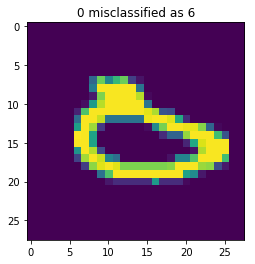

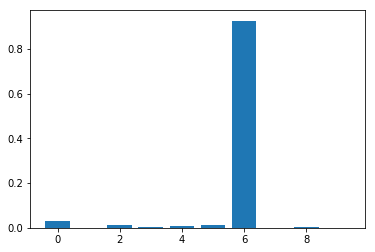

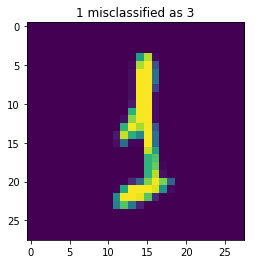

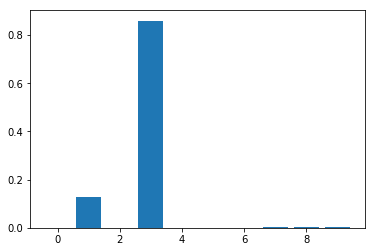

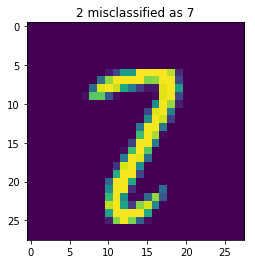

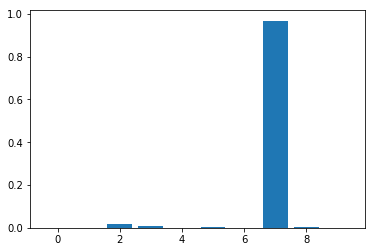

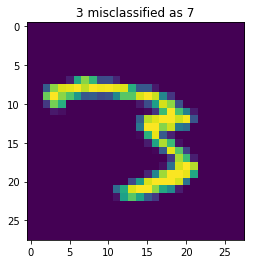

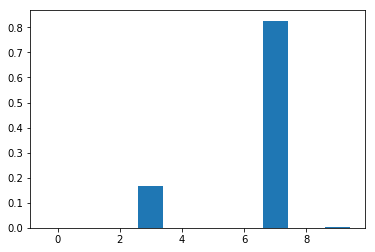

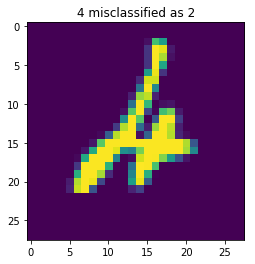

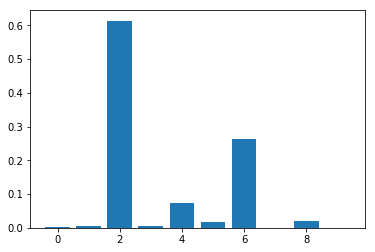

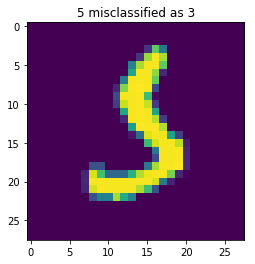

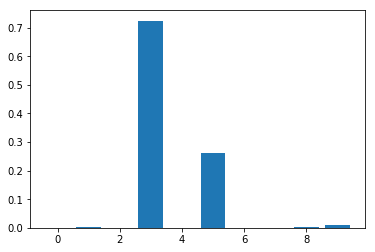

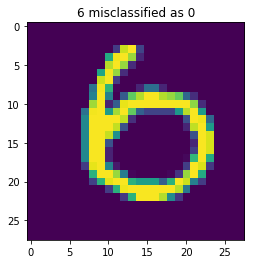

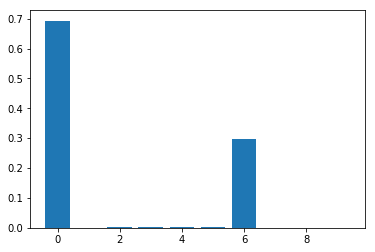

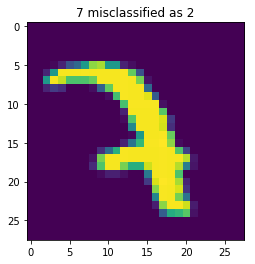

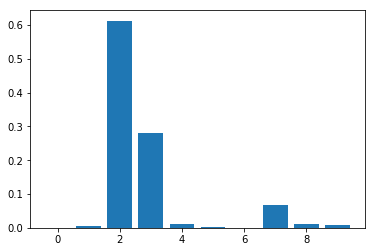

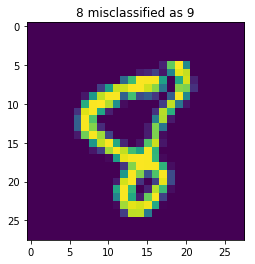

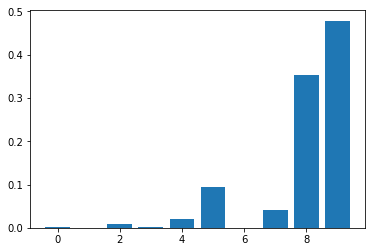

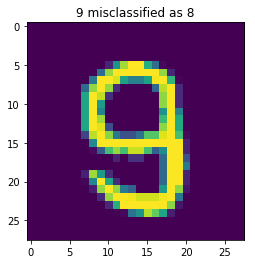

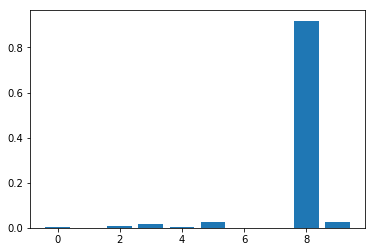

In [49]:
import matplotlib.pyplot as plt
#for numbers 1 -> 10, x_test item at the missclassified index
for j in range(10):
    idx = find_misclassified(j, y_test, lgr_pred)
    display = x_test[idx].reshape(28,28)
    plt.imshow(display)
    plt.title(str(y_test[idx]) + " misclassified as " + str(lgr_pred[idx]))
    plt.show()
    plt.bar( list(range(10)), lgr_clf.predict_proba(x_test_meta[idx:idx+1])[0])   
    plt.show()
    #generate bar graphs showing the predicted class distributions
    #plt.bar(x_test, height=display, width=0.8, bottom=None, align='center', data=None)
    #plt.figure(j+1)
    #plt.bar( list(range(10)), lgr_clf.predict_proba(x_test_meta[idx:idx+1])[0])    
    #plt.figure(j+1)
    
#plt.show()